In [393]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [394]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [395]:
unit = "metric"

In [396]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="
query_url1 = url + "appid=" + weather_api_key + "&q=" + city
query_url2 = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + city

In [397]:
#for metro in cities:

response = requests.get(query_url2).json()
    
lat = response['coord']['lat']
lon = response['coord']['lon']
mt = response['main']['temp_max']
hum = response['main']['humidity']
cl = response['clouds']['all']
ws = response['wind']['speed'] 
cntry = response['name']
date = response['dt']



In [399]:
lats = []
lons = []
mts = []
hums = []
cls = []
wss = []
cntrys = []
dates = []
cityname = []

for metro in cities:
    query_url2 = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + metro
    
    response = requests.get(query_url2).json()
    
    try:
        response = requests.get(query_url2).json()
        cityname.append(response['name'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        mts.append(response['main']['temp_max'])
        hums.append(response['main']['humidity'])
        cls.append(response['clouds']['all'])
        wss.append(response['wind']['speed'])
        cntrys.append(response['sys']['country'])
        dates.append(response['dt'])
        
        print(response['name'])
    
    except KeyError:
        print("On to the next one")
    
    


Vila Velha
Qaanaaq
George Town
Lorengau
Fairbanks
Sabang
Albany
Hofn
Thompson
Capoterra
Salalah
Hilo
Lüderitz
Ushuaia
Busselton
Hithadhoo
Severo-Kuril'sk
Turan
Borzya
Puerto Ayora
Rawson
Ribeira Grande
Nouadhibou
Bredasdorp
Pevek
Iqaluit
Dali
Sibolga
Chokurdakh
Carnarvon
Polson
On to the next one
Tadine
Airai
Tuktoyaktuk
On to the next one
Peleduy
Torbay
Tasiilaq
On to the next one
Dunedin
On to the next one
Cairns
Butaritari
Port Alfred
Hare Bay
Rikitea
San Cristobal
Hualmay
Gornopravdinsk
Chengde
Cape Town
On to the next one
On to the next one
Vaini
Alofi
Katsuura
On to the next one
La Peca
Bethel
Coyhaique
Mataura
Punta Arenas
Usvyaty
Pahrump
Marsh Harbour
Chas
Atuona
Camaná
Fonte Boa
Yellowknife
East London
San Miguel de Cozumel
On to the next one
Mount Gambier
On to the next one
Dikson
Yeniseysk
On to the next one
Cururupu
Bilma
Mar del Plata
Wanning
On to the next one
Touros
On to the next one
Esperance
Cayenne
On to the next one
Tierra Colorada
Tamale
Khovd
Águilas
Belawan
Herma

In [400]:
weather_dict = {
    "City": cityname,
    "Latitude": lats, 
    "Longitude": lons,
    "Max Temp": mts,
    "Humidity": hums,
    "Cloudiness": cls,
    "Wind Speed": wss, 
    "Country": cntrys,
    "Date": dates
}


In [401]:
df = pd.DataFrame(weather_dict)

In [402]:
df.head(20)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Velha,-20.3297,-40.2925,24.97,73,20,6.69,BR,1651952757
1,Qaanaaq,77.4840,-69.3632,-6.80,79,100,0.47,GL,1651953179
2,George Town,5.4112,100.3354,29.97,92,20,3.09,MY,1651953179
3,Lorengau,-2.0226,147.2712,27.88,82,66,5.84,PG,1651953180
4,Fairbanks,64.8378,-147.7164,8.46,87,75,0.00,US,1651953180
5,Sabang,5.8933,95.3214,27.48,80,100,4.42,ID,1651952587
6,Albany,42.6001,-73.9662,15.81,33,100,0.89,US,1651953182
7,Hofn,64.2539,-15.2082,6.72,77,10,5.25,IS,1651953182
8,Thompson,55.7435,-97.8558,19.09,52,40,4.12,CA,1651953183
9,Capoterra,39.1763,8.9718,15.30,86,20,2.06,IT,1651953184


In [403]:
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,21.233389,21.465991,17.208055,70.400000,57.583636,3.711600,1.651953e+09
std,32.438933,90.126772,10.623617,21.721369,39.991020,2.600911,1.883567e+02
min,-54.800000,-179.166700,-22.770000,1.000000,0.000000,0.000000,1.651952e+09
25%,-4.994950,-54.702075,9.995000,60.000000,15.250000,1.880000,1.651953e+09
50%,26.154450,24.375000,18.780000,76.000000,75.000000,3.090000,1.651953e+09
75%,48.729100,102.341875,25.462500,87.000000,100.000000,4.870000,1.651953e+09
max,78.218600,179.316700,39.050000,100.000000,100.000000,23.660000,1.651954e+09


In [404]:
df_hum = df.loc[df['Humidity'] > 100]

In [405]:
df_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


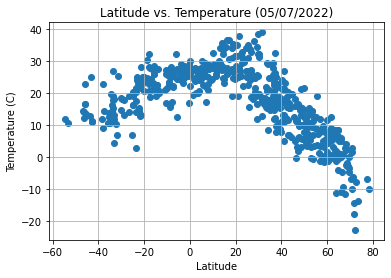

In [406]:
plt.scatter(lats, mts, marker = "o")

plt.grid()

plt.title("Latitude vs. Temperature (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.savefig("../WeatherPy/LatvsTemp.png")
plt.show()

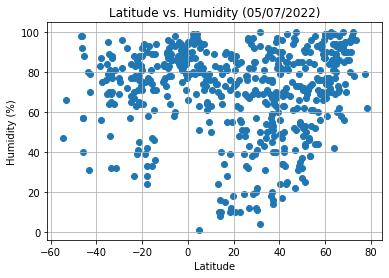

In [407]:
plt.scatter(lats, hums, marker = "o")

plt.grid()

plt.title("Latitude vs. Humidity (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../WeatherPy/LatvsHum.png")
plt.show()

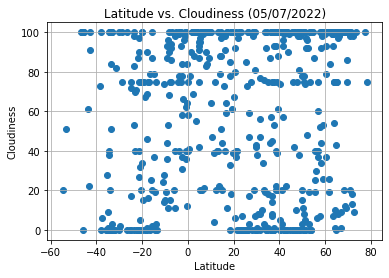

In [408]:
plt.scatter(lats, cls, marker = "o")

plt.grid()

plt.title("Latitude vs. Cloudiness (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../WeatherPy/LatvsCloud.png")
plt.show()

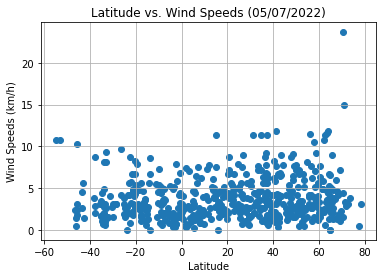

In [409]:
plt.scatter(lats, wss, marker = "o")

plt.grid()

plt.title("Latitude vs. Wind Speeds (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds (km/h)")
plt.savefig("../WeatherPy/LatvsWind.png")
plt.show()

In [411]:
## Linear Regression ##

In [412]:
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8476042142350453


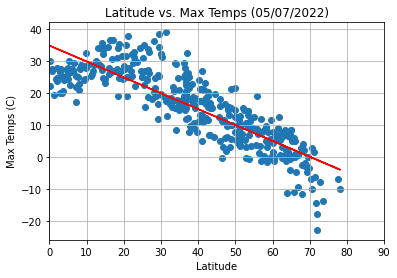

In [413]:
n_lat_range = 90

nlat = df[df['Latitude'] > 0].Latitude

nmts = df[df['Latitude'] > 0]['Max Temp']

n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(nlat, nmts)

n_fit = n_slope * nlat + n_int

plt.xlim(0, n_lat_range)
plt.scatter(nlat, nmts, marker = "o")

plt.plot(nlat, n_fit, "r-")
plt.grid()
plt.title("Latitude vs. Max Temps (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
print(f"The r-value is: {n_r}")
plt.savefig("../WeatherPy/LatvsMaxreg.png")
plt.show()

In [414]:
## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6773555913479159


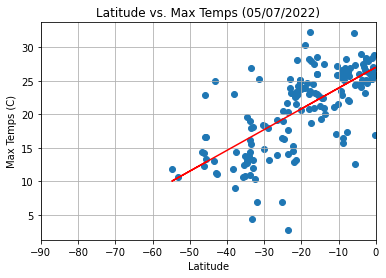

In [415]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

smts = df[df['Latitude'] < 0]['Max Temp']

s_slope, s_int, s_r, s_p, s_std_err = stats.linregress(slat, smts)

s_fit = s_slope * slat + s_int

plt.xlim(s_lat, 0)

plt.scatter(slat, smts, marker = "o")
plt.plot(slat, s_fit, "r-")
plt.grid()
plt.title("Latitude vs. Max Temps (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
print(f"The r-value is: {s_r}")
plt.savefig("../WeatherPy/LatvsSMaxreg.png")
plt.show()

In [416]:
## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.6773555913479159


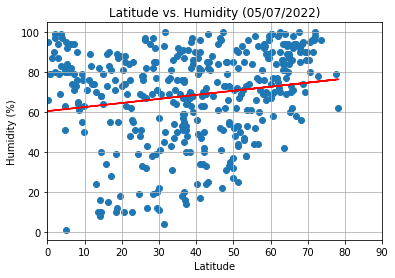

In [417]:
n_lat = 90

nlat = df[df['Latitude'] > 0].Latitude

nhum = df[df['Latitude'] > 0]['Humidity']

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(nlat, nhum)

nh_fit = nh_slope * nlat + nh_int

plt.xlim(0, n_lat)

plt.scatter(nlat, nhum, marker = "o")
plt.plot(nlat, nh_fit, "r-")
plt.grid()
plt.title("Latitude vs. Humidity (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {s_r}")
plt.savefig("../WeatherPy/LatvsNHum.png")
plt.show()

In [418]:
## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2680406922517264


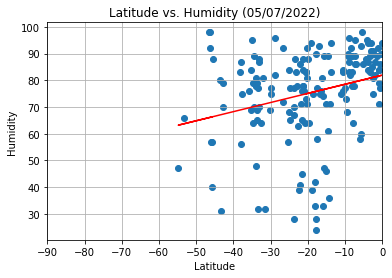

In [419]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

shum = df[df['Latitude'] < 0]['Humidity']

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(slat, shum)

sh_fit = sh_slope * slat + sh_int

plt.xlim(s_lat, 0)

plt.scatter(slat, shum, marker = "o")
plt.plot(slat, sh_fit, "r-")
plt.grid()
plt.title("Latitude vs. Humidity (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {sh_r}")
plt.savefig("../WeatherPy/LatvsSHum.png")
plt.show()

In [420]:
## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02553735583542919


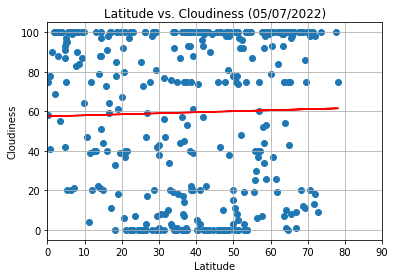

In [421]:
n_lat = 90

nlat = df[df['Latitude'] > 0].Latitude

ncls = df[df['Latitude'] > 0]['Cloudiness']

ncls_slope, ncls_int, ncls_r, ncls_p, ncls_std_err = stats.linregress(nlat, ncls)

ncls_fit = ncls_slope * nlat + ncls_int

plt.xlim(0, n_lat)

plt.scatter(nlat, ncls, marker = "o")
plt.plot(nlat, ncls_fit, "r-")
plt.grid()
plt.title("Latitude vs. Cloudiness (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {ncls_r}")
plt.savefig("../WeatherPy/LatvsNCloud.png")
plt.show()

In [422]:
## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11006769462272534


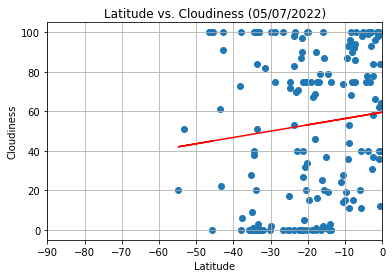

In [423]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

scls = df[df['Latitude'] < 0]['Cloudiness']

scls_slope, scls_int, scls_r, scls_p, scls_std_err = stats.linregress(slat, scls)

scls_fit = scls_slope * slat + scls_int

plt.xlim(s_lat, 0)

plt.scatter(slat, scls, marker = "o")
plt.plot(slat, scls_fit, "r-")
plt.grid()
plt.title("Latitude vs. Cloudiness (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {scls_r}")
plt.savefig("../WeatherPy/LatvsSCloud.png")
plt.show()

In [424]:
## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11616918694203196


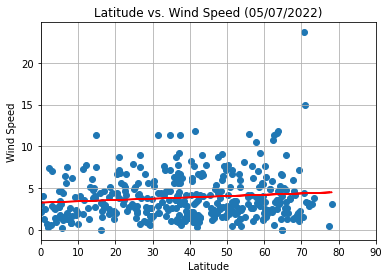

In [425]:
n_lat = 90

nlat = df[df['Latitude'] > 0].Latitude

nwss = df[df['Latitude'] > 0]['Wind Speed']

nwss_slope, nwss_int, nwss_r, nwss_p, nwss_std_err = stats.linregress(nlat, nwss)

nwss_fit = nwss_slope * nlat + nwss_int

plt.xlim(0, n_lat)

plt.scatter(nlat, nwss, marker = "o")
plt.plot(nlat, nwss_fit, "r-")
plt.grid()
plt.title("Latitude vs. Wind Speed (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {nwss_r}")
plt.savefig("../WeatherPy/LatvsNWind.png")
plt.show()

In [426]:
## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1724867600809611


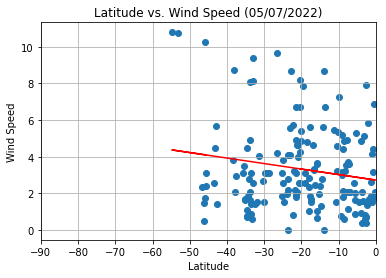

In [427]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

swss = df[df['Latitude'] < 0]['Wind Speed']

swss_slope, swss_int, swss_r, swss_p, swss_std_err = stats.linregress(slat, swss)

swss_fit = swss_slope * slat + swss_int

plt.xlim(s_lat, 0)

plt.scatter(slat, swss, marker = "o")
plt.plot(slat, swss_fit, "r-")
plt.grid()
plt.title("Latitude vs. Wind Speed (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {swss_r}")
plt.savefig("../WeatherPy/LatvsSWind.png")
plt.show()